# INFO 2950 Project Phase IV
GitHub Repo: https://github.com/gaby-chu/info2950

## Our Research Question 

To what extent is the language chosen in bilingual program schools in New York City influenced by the ethnic/racial breakdown of the school (and economic factors)?

Read more about our research question and listen to the podcast that inspired us: https://www.nytimes.com/2020/07/23/podcasts/nice-white-parents-serial.html

## Data Description 
**Sources for our Data:**

2019-20 Demographic Snapshot - School
(https://data.cityofnewyork.us/Education/2019-20-Demographic-Snapshot-School/nie4-bv6q)

2020-2021 Bilingual Program List
(https://data.cityofnewyork.us/Education/2020-2021-Bilingual-Program-List-Final-Publication/rrd7-vuvp/data)



The **2020-2021 Bilingual Program Dataset** was sourced from NYC OpenData. The information within this dataset reports all of the bilingual programs in New York City for the 2020-2021 school year, sorted by program type and language per school. It is organized by borough and school district. NYC OpenData was developed as part of an initiative to make the NYC government more accessible, transparent and accountable. The open, free, public data is produced by various city agencies, including the Department of Education, Department of Buildings, New York City Taxi and Limousine Commission, Board of Corrections, etc. By centralizing data from all these NYC agencies, the hope is that citizens will have a more efficient way to find useful, machine-readable data.
This particular data is owned and provided by the New York City Department of Education. Regarding influences on data collection, because this should be a comprehensive list of schools with bilingual programs in the city, there should not be schools that are excluded, at least not on purpose. Whether a school has a bilingual program or not is public information and should be relatively easy to collect, and thus there should not be any problems in terms of collection bias and recording. The stakeholders here are the schools, not any individuals in particular, so there should also not be problems with the misuse of information, especially since it is not personal information. Data collected within this dataset that was preprocessed includes the language translated column to the language written in English. For example, columns that indicate the language as Spanish have the language translated column to be preprocessed to Español. In addition, the school DBN column was also preprocessed from the given school name as individuals are more likely to know the school name and then the data preprocesses the name of the school to the school DBN. 

There are 538 rows, each corresponding to a different NYC school. There are 11 columns, detailing borough, borough/citywide office, district, school, school name, school category (K-8, elementary, early childhood, etc.), program, program language, program language translated into the respective language, whether the school is a general or special education school, and special education model. Based on the website, there is no evidence of preprocessing of the data. However, the data is quite clean already, so it could be possible that there was some data cleaning done on the part of NYC OpenData, primarily just figuring out which schools had bilingual programs, and inputting all the corresponding information about the school itself to prevent the dataset from having any null or NaN values.


Similar to the bilingual dataset, the **2019-20 Demographic Snapshot Dataset** was also sourced from NYC Open Data which was created by the NYC government in order to make the NYC government more accessible and transparent. Likewise, this dataset is also owned by the NYC Department of Education.This dataset details student demographics and enrollment data by school from 2015-2016 through 2019 to 2020. These enrollment counts were taken on October 31st for all of the audited register schools for each school year. There are 9,096 rows and 39 columns with each column detailing specific information regarding the schools in the rows. Some of the columns include the DBN, the year that the count was taken in, as well as presenting subpopulations through the breakdown by school grade, ethnic breakdown (Asian, black, white, Hispanic, and other), gender, and the percentage of students in poverty at the school. After our data analysis for phase II, we found that the data is mostly comprised of the Hispanic subpopulation. The 9096 rows do not include 9096 individual schools but rather each school can have multiple rows in order to detail the snapshot for each individual year. 

Because the data was recorded on October 31st for all of the years for all of the schools, the numbers presented do not account for the whole makeup of the population till the end of the year. For example, students who moved to a new school are not counted for if they joined after October 31st. Because the observations were from an audited register, the schools could not change their numbers significantly since the observation was accounted for by an official hired by the government. 

Preprocessing conducted during the collection of this dataset includes determining the definition of poverty and the threshold students need to meet in order to be counted into the percentage of poverty reported to the Department of Education on this particular dataset. Along with the poverty threshold, preprocessing also includes forming the economic need index. 
The schools were not involved in the process of data collection. Although we are counting the number of students within each category, the students were not involved in the process of data collection and the purpose of this dataset that is provided by the NYCDOE is to create more transparency and accountability amongst the schools and the public. 

Because both datasets are "snapshots" in time, they would not be updated until the next year rolls around, when new data would have been collected and a new dataset would be created to reflect the addition of a new year of data. Older versions/snapshots of the datasets will continue to be hosted on NYC Open Data.

### Data Cleaning
Our goal for data cleaning was to merge two datasets together, one containing a list of all the schools in NYC that had bilingual programs, and another that contained demographic data for each school. To do this, we first cleaned each separately by fixing data types to match each other and keeping only the data for the year that we wanted. We got rid of the null values and then merged the two datasets.

In [1]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
bilingual_data = pd.read_csv("bilingual_rates.csv")

####### FIXING/CLEANING COLUMNS
# print(bilingual_data.columns)
bilingual_data.rename(columns={"School Name":"school_name", "School": "DBN"}, inplace=True)
bilingual_data = bilingual_data.drop(columns = ['Language (Translated)', 'Special Education Model'])


####### FIXING DATA TYPES
# print(bilingual_data.dtypes)
# change DBN + school name to string, district is already an int
bilingual_str_columns = ['Borough', 'Borough/Citywide Office (B/CO)', 'DBN', 'school_name', 'School Category', 'Program', 'Language', 'General/Special Education']
bilingual_data[bilingual_str_columns] = bilingual_data[bilingual_str_columns].astype("string")
# print(bilingual_data.dtypes)

####### GETTING RID OF NULL'S
# print(len(bilingual_data))
notnull_array = bilingual_data.notnull()
notnull_array.head()

# include only rows that do not contain null values
bilingual_data = bilingual_data[notnull_array]
bilingual_data
# print(len(bilingual_data))


####### DROP ACCESS AND TRANSITIONAL SCHOOLS (they are not traditional bilingual programs whose focus is teaching a second language)
dropSchools = bilingual_data.loc[(bilingual_data['Borough/Citywide Office (B/CO)'] == "ACCESS") | (bilingual_data['Program'] != "Dual Language")]
# print(dropSchools)

bilingual_data.drop(dropSchools.index, inplace=True)
display(bilingual_data)


####### OTHER DATA CLEANING/EXPLORATION
print(bilingual_data.shape)

,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name,School Category,Program,Language,General/Special Education
0,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,General Education
1,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Spanish,General Education
2,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,General Education
3,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,Special Education
4,Manhattan,Manhattan,1,01M188,P.S. 188 The Island School,K-8,Dual Language,Spanish,General Education
...,...,...,...,...,...,...,...,...,...
499,Brooklyn,Brooklyn North,32,32K556,Bushwick Leaders High School for Academic Exce...,High school,Dual Language,Spanish,Special Education
500,Brooklyn,Brooklyn North,32,32K562,Evergreen Middle School for Urban Exploration,Junior High-Intermediate-Middle,Dual Language,Spanish,General Education
503,Brooklyn,District 75,75,75K373,P.S. 373 - Brooklyn Transition Center,High school,Dual Language,Spanish,Special Education
524,Bronx,District 75,75,75X186,P186X Walter J. Damrosch School,K-12 all grades,Dual Language,Spanish,Special Education


(264, 9)


In [3]:
demographic_data = pd.read_csv("demographic_schools.csv")

####### FIXING/CLEANING COLUMNS
# print(demographic_data.columns)
demographic_data.rename(columns={"School Name":"school_name"}, inplace=True)


####### FIXING DATA TYPES
print(demographic_data.dtypes) # DBN + school name + year should be string; # Poverty, % Poverty, Economic Need Index should be ints/floats
dem_str_columns = ['DBN', 'school_name', 'Year', 'Economic Need Index']
demographic_data[dem_str_columns] = demographic_data[dem_str_columns].astype("string")

demographic_data['Economic Need Index'] = demographic_data['Economic Need Index'].str.replace("%", "") # '# Poverty', '% Poverty', 'Economic Need Index' have special values like "Above 95%" and others are decimals..
dropAbove = demographic_data.loc[(demographic_data['Economic Need Index'] == "Above 95") | (demographic_data['Economic Need Index'] == "Below 5")]
display(dropAbove)
print(dropAbove.index)
demographic_data.drop(dropAbove.index, inplace=True)
# display(demographic_data)
demographic_data['Economic Need Index'] = demographic_data['Economic Need Index'].astype("float64")

print(demographic_data.dtypes)
# print(demographic_data)


####### ONLY KEEP 2019-20 DATA
demographic_data = demographic_data[demographic_data['Year'] == "2019-20"]
demographic_data


####### GETTING RID OF NULL'S
# print(len(demographic_data))
notnull_array = demographic_data.notnull()
notnull_array.head()

# include only rows that do not contain null values
demographic_data = demographic_data[notnull_array]
demographic_data.head()
# print(len(demographic_data))
display(demographic_data)


####### OTHER DATA CLEANING/EXPLORATION
demographic_data.shape
# demographic_data.describe()

DBN                                            object
school_name                                    object
Year                                           object
Total Enrollment                                int64
Grade 3K+PK (Half Day & Full Day)               int64
Grade K                                         int64
Grade 1                                         int64
Grade 2                                         int64
Grade 3                                         int64
Grade 4                                         int64
Grade 5                                         int64
Grade 6                                         int64
Grade 7                                         int64
Grade 8                                         int64
Grade 9                                         int64
Grade 10                                        int64
Grade 11                                        int64
Grade 12                                        int64
# Female                    

,DBN,school_name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
19,01M034,P.S. 034 Franklin D. Roosevelt,2019-20,296,17,24,26,16,18,21,...,0.007,8,0.027,114,0.385,17,0.057,Above 95%,Above 95%,Above 95
58,01M188,P.S. 188 The Island School,2017-18,433,19,37,40,43,43,47,...,0.000,12,0.028,135,0.312,69,0.159,399,92.1%,Above 95
59,01M188,P.S. 188 The Island School,2018-19,407,16,24,37,32,49,39,...,0.007,15,0.037,148,0.364,30,0.074,Above 95%,Above 95%,Above 95
60,01M188,P.S. 188 The Island School,2019-20,398,13,29,24,50,33,50,...,0.008,9,0.023,135,0.339,39,0.098,Above 95%,Above 95%,Above 95
117,01M515,Lower East Side Preparatory High School,2017-18,557,0,0,0,0,0,0,...,0.011,10,0.018,31,0.056,392,0.704,431,77.4%,Above 95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8380,84K912,Key Collegiate Charter School,2018-19,114,0,0,0,0,0,69,...,0.000,4,0.035,40,0.351,1,0.009,Above 95%,Above 95%,Above 95
8533,84M383,Storefront Academy Harlem Charter School,2019-20,41,0,27,14,0,0,0,...,0.049,1,0.024,10,0.244,2,0.049,Above 95%,Above 95%,Above 95
8553,84M388,St. HOPE Leadership Academy Charter School,2019-20,294,0,0,0,0,0,0,...,0.014,4,0.014,73,0.248,14,0.048,Above 95%,Above 95%,Above 95
8787,84X200,New Visions A.I.M. Charter High School II,2019-20,214,0,0,0,0,0,0,...,0.019,2,0.009,88,0.411,13,0.061,195,91.1%,Above 95


Int64Index([  19,   58,   59,   60,  117,  119,  196,  325,  326,  458,
            ...
            7941, 7942, 7943, 7969, 7971, 8380, 8533, 8553, 8787, 8870],
           dtype='int64', length=416)
DBN                                            string
school_name                                    string
Year                                           string
Total Enrollment                                int64
Grade 3K+PK (Half Day & Full Day)               int64
Grade K                                         int64
Grade 1                                         int64
Grade 2                                         int64
Grade 3                                         int64
Grade 4                                         int64
Grade 5                                         int64
Grade 6                                         int64
Grade 7                                         int64
Grade 8                                         int64
Grade 9                                      

,DBN,school_name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
4,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,...,0.011000,9,0.047000,44,0.232000,17,0.089000,155,81.6%,86.900000
9,01M019,P.S. 019 Asher Levy,2019-20,236,16,25,27,39,45,42,...,0.038000,19,0.081000,94,0.398000,8,0.034000,176,74.6%,70.000000
14,01M020,P.S. 020 Anna Silver,2019-20,464,41,63,61,71,76,65,...,0.034000,31,0.067000,102,0.220000,61,0.131000,352,75.9%,78.200000
24,01M063,The STAR Academy - P.S.63,2019-20,229,26,40,34,38,30,32,...,0.031000,17,0.074000,69,0.301000,5,0.022000,177,77.3%,78.200000
30,01M064,P.S. 064 Robert Simon,2019-20,236,34,23,44,30,41,31,...,0.021000,10,0.042000,63,0.267000,4,0.017000,214,90.7%,91.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,84X705,Family Life Academy Charter School,2019-20,405,0,115,54,76,55,53,...,0.004938,1,0.002469,35,0.086420,90,0.222222,373,0.9209876656532288,0.884186
9080,84X706,Harriet Tubman Charter School,2019-20,663,0,71,65,83,77,78,...,0.018100,5,0.007541,61,0.092006,68,0.102564,536,0.80844646692276,0.877929
9085,84X717,Icahn Charter School,2019-20,323,0,33,40,40,41,38,...,0.009288,0,0.000000,20,0.061920,21,0.065015,276,0.8544891476631165,0.821765
9090,84X718,Bronx Charter School for Better Learning,2019-20,571,18,103,78,80,101,97,...,0.028021,11,0.019264,67,0.117338,7,0.012259,448,0.7845884561538696,0.624517


(1737, 39)

In [4]:
####### MERGE:
bilingual_demographic_data = pd.merge(bilingual_data, demographic_data, on="DBN")
# bilingual_demographic[3:200:5]
bilingual_demographic_data


display(bilingual_demographic_data.loc[(bilingual_demographic_data['Economic Need Index'] >= 60) | (bilingual_demographic_data['Economic Need Index'] <= 5)])


# bilingual_demographic_data['Economic Need Index'] = bilingual_demographic_data['Economic Need Index'].str.replace("%", "")
# dropAbove = bilingual_demographic_data.loc[(bilingual_demographic_data['Economic Need Index'] == "Above 95") | (bilingual_demographic_data['Economic Need Index'] == "Below 5")]
# display(dropAbove)
# print(dropAbove.index)
# bilingual_demographic_data.drop(dropAbove.index, inplace=True)
# # display(demographic_data)
# bilingual_demographic_data['Economic Need Index'] = bilingual_demographic_data['Economic Need Index'].astype("float64")


,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name_x,School Category,Program,Language,General/Special Education,school_name_y,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,General Education,P.S. 020 Anna Silver,...,0.034,31,0.067,102,0.220,61,0.131,352,75.9%,78.2
1,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Spanish,General Education,P.S. 020 Anna Silver,...,0.034,31,0.067,102,0.220,61,0.131,352,75.9%,78.2
2,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,General Education,P.S. 184m Shuang Wen,...,0.069,52,0.074,117,0.165,99,0.140,469,66.3%,67.2
3,Manhattan,Manhattan,1,01M184,P.S. 184m Shuang Wen,K-8,Dual Language,Chinese,Special Education,P.S. 184m Shuang Wen,...,0.069,52,0.074,117,0.165,99,0.140,469,66.3%,67.2
4,Manhattan,Manhattan,1,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Dual Language,Chinese,General Education,School for Global Leaders,...,0.029,10,0.049,83,0.407,17,0.083,172,84.3%,84.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Brooklyn,Brooklyn North,32,32K384,P.S. /I.S. 384 Frances E. Carter,K-8,Dual Language,Spanish,General Education,P.S. /I.S. 384 Frances E. Carter,...,0.002,5,0.011,118,0.265,93,0.209,382,85.8%,90.6
243,Brooklyn,Brooklyn North,32,32K384,P.S. /I.S. 384 Frances E. Carter,K-8,Dual Language,Spanish,Special Education,P.S. /I.S. 384 Frances E. Carter,...,0.002,5,0.011,118,0.265,93,0.209,382,85.8%,90.6
244,Brooklyn,Brooklyn North,32,32K556,Bushwick Leaders High School for Academic Exce...,High school,Dual Language,Spanish,Special Education,Bushwick Leaders High School for Academic Exce...,...,0.029,4,0.012,84,0.248,92,0.271,Above 95%,Above 95%,93.4
245,Brooklyn,Brooklyn North,32,32K562,Evergreen Middle School for Urban Exploration,Junior High-Intermediate-Middle,Dual Language,Spanish,General Education,Evergreen Middle School for Urban Exploration,...,0.000,11,0.029,89,0.234,66,0.174,351,92.4%,91.8


In [5]:
bilingual_demographic_data.to_csv('bilingual_demographic-data.csv', index=False)

### Exploratory Data Analysis

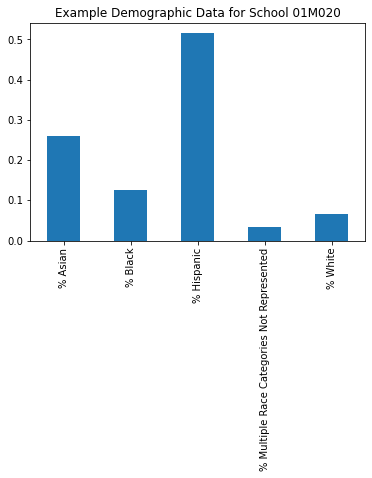

All Languages Available:  ['Arabic', 'Chinese', 'French', 'Haitian Creole', 'Italian', 'Japanese', 'Korean', 'Polish', 'Russian', 'Spanish']
10


In [6]:
"""Mean, correlation, standard deviation, 
what is dataset capable of, 
do calculations + histograms + charts if u can, 
write a lot + explain what you’re doing as you go"""

num_race_data = bilingual_demographic_data[['# Asian', '# Black', '# Hispanic', '# Multiple Race Categories Not Represented', '# White']]

percent_race_data = bilingual_demographic_data[['% Asian', '% Black', '% Hispanic', '% Multiple Race Categories Not Represented', '% White']]

#demographic data for one school (with DBN 01M020 specifically)
specific_percent_race_data = bilingual_demographic_data.loc[0, ['% Asian', '% Black', '% Hispanic', '% Multiple Race Categories Not Represented', '% White']]
specific_percent_race_data.describe()
specific_percent_race_data.plot.bar()
plt.title("Example Demographic Data for School 01M020")
plt.show()


languages = bilingual_demographic_data['Language'].unique()
languages = sorted(languages)
print("All Languages Available: ", languages)
print(len(languages))

display(bilingual_demographic_data.groupby("Language").DBN)
# bilingual_demographic_data.head()


# SOME OTHER IDEAS:
# (most common) ethnic breakdown in each school vs. language –– graph?
# group schools by language + see the average ethnic breakdown
# line graph for correlation/linear regression

#### KMeans
For our exploratory data analysis, our intial goal was to create a kMeans clustering model. We wanted to plot the data for the language program against the data for the most prominent ethic group for the school to see if the school language program matches the school ethnic breakdown. To do this, we wrote each language and ethnicity to a number and fit the data to a kMeans cluster. However, after trying to cluster the data, we realized this model would not work because our data maps out to discrete data points which can not be clustered because the points are layed on top of each other.

In [7]:
####### [REPLACE WITH LOGISTIC REGRESSION INSTEAD?]
# kmeans clustering (predicted bilingual language based on most common ethnic group vs. actual bilingual language)
#mostCommonEthnicGroup = percent_race_data.max(axis=1).key
# print(mostCommonEthnicGroup)
#bilingual_demographic_data['mostCommonEthnicGroup'] = mostCommonEthnicGroup


#find the column name of the max % ethnic group
bilingual_demographic_data['mostCommonEthnicGroup'] = percent_race_data.idxmax(axis=1)
# TODO: remove "%"

mostCommonEthnicGroupList = ['% Asian', '% Black', '% Hispanic', '% Multiple Race Categories Not Represented', '% White']
# print("mostCommonEthnicGroupList: ", mostCommonEthnicGroupList)
# bilingual_demographic_data[['% Asian', '% Black', '% Hispanic', '% Multiple Race Categories Not Represented', '% White', 'mostCommonEthnicGroup']]


# create tables for assigning languages and ethnicity to numbers
assigned_language_lookup = pd.DataFrame({"language_number": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        "Language": languages})

assigned_ethnicity_lookup = pd.DataFrame({"ethnicity_number": [0, 1, 2, 3, 4],
                                        "mostCommonEthnicGroup": mostCommonEthnicGroupList})


# ['Arabic' => White?? , 'Chinese' => Asian, 'French' => White, 
#  'Haitian Creole' => BLack, 'Italian' => White, 'Japanese' => Asian, 
#  'Korean' => Asian, 'Polish' => White, 'Russian' => White, 'Spanish' =>Hispanic]
# predicted_language_lookup = pd.DataFrame({"predicted_language": languages, 
#                                           "mostCommonEthnicGroup": ['% White', '% Asian', '% White', '% Black', '% White',
#                                                           '% Asian', '% Asian', '% White', '% White', '% Hispanic']})

# FLIPPED:
#['% Asian' => Chinese, Korean, Japanese; '% Black' => Haitian, '% Hispanic' => Spanish, '% Multiple Race Categories Not Represented' => ???, '% White' => French]
predicted_language_lookup = pd.DataFrame({"mostCommonEthnicGroup": mostCommonEthnicGroupList, 
                                          "predicted_language": ['Chinese', 'Haitian Creole', 'Spanish', 'Arabic', 'French'] })

display(assigned_language_lookup)
display(assigned_ethnicity_lookup)
display(predicted_language_lookup)


# merging
language_cluster_data = pd.merge(bilingual_demographic_data, assigned_language_lookup, on="Language")
# display(language_cluster_data)

lang_ethnicity_cluster_data = pd.merge(language_cluster_data, assigned_ethnicity_lookup, on="mostCommonEthnicGroup")
# language_cluster_data = pd.merge(language_cluster_data, assigned_ethnicity_lookup, on="DBN")
# display(lang_ethnicity_cluster_data)

predicted_cluster_data = pd.merge(lang_ethnicity_cluster_data, predicted_language_lookup, on="mostCommonEthnicGroup")
# display(predicted_cluster_data)

full_data = predicted_cluster_data
display(full_data)

,language_number,Language
0,0,Arabic
1,1,Chinese
2,2,French
3,3,Haitian Creole
4,4,Italian
5,5,Japanese
6,6,Korean
7,7,Polish
8,8,Russian
9,9,Spanish


,ethnicity_number,mostCommonEthnicGroup
0,0,% Asian
1,1,% Black
2,2,% Hispanic
3,3,% Multiple Race Categories Not Represented
4,4,% White


,mostCommonEthnicGroup,predicted_language
0,% Asian,Chinese
1,% Black,Haitian Creole
2,% Hispanic,Spanish
3,% Multiple Race Categories Not Represented,Arabic
4,% White,French


,Borough,Borough/Citywide Office (B/CO),District,DBN,school_name_x,School Category,Program,Language,General/Special Education,school_name_y,...,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,mostCommonEthnicGroup,language_number,ethnicity_number,predicted_language
0,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,General Education,P.S. 020 Anna Silver,...,0.220,61,0.131,352,75.9%,78.2,% Hispanic,1,2,Spanish
1,Manhattan,Manhattan,1,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Dual Language,Chinese,General Education,School for Global Leaders,...,0.407,17,0.083,172,84.3%,84.7,% Hispanic,1,2,Spanish
2,Brooklyn,Brooklyn North,14,14K250,P.S. 250 George H. Lindsay,Elementary,Dual Language,Chinese,General Education,P.S. 250 George H. Lindsay,...,0.167,44,0.108,330,81.1%,86.4,% Hispanic,1,2,Spanish
3,Queens,Queens North,24,24Q013,P.S. 013 Clement C. Moore,Elementary,Dual Language,Chinese,General Education,P.S. 013 Clement C. Moore,...,0.147,385,0.277,1065,76.6%,79.4,% Hispanic,1,2,Spanish
4,Manhattan,Manhattan,1,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Spanish,General Education,P.S. 020 Anna Silver,...,0.220,61,0.131,352,75.9%,78.2,% Hispanic,9,2,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Brooklyn,Brooklyn North,13,13K020,P.S. 020 Clinton Hill,Elementary,Dual Language,French,General Education,P.S. 020 Clinton Hill,...,0.158,26,0.048,288,53.4%,48.0,% Black,2,1,Haitian Creole
243,Brooklyn,Brooklyn North,13,13K691,Fort Greene Preparatory Academy,Junior High-Intermediate-Middle,Dual Language,French,General Education,Fort Greene Preparatory Academy,...,0.316,12,0.057,192,91.9%,88.3,% Black,2,1,Haitian Creole
244,Brooklyn,Brooklyn North,16,16K005,P.S. 005 Dr. Ronald McNair,Elementary,Dual Language,French,General Education,P.S. 005 Dr. Ronald McNair,...,0.258,13,0.052,197,79.4%,81.6,% Black,2,1,Haitian Creole
245,Manhattan,Manhattan,3,03M242,P.S. 242 - The Young Diplomats Magnet Academy,Elementary,Dual Language,Italian,Special Education,P.S. 242 - The Young Diplomats Magnet Academy,...,0.329,11,0.079,118,84.3%,85.0,% Black,4,1,Haitian Creole


In [8]:
language_cluster_data.to_csv('language_cluster_data.csv', index=False)
full_data.to_csv('full_data.csv', index=False)

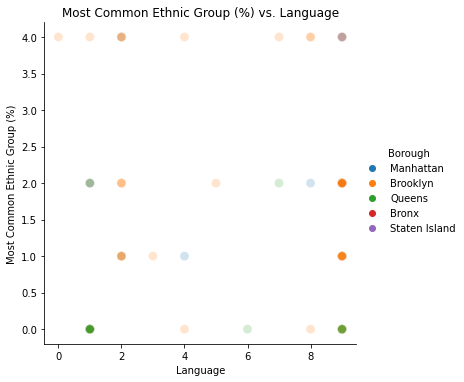

In [9]:
clustering = KMeans(n_clusters = 12)

# execute the KMeans algorithm
clustering.fit(full_data[["language_number", "ethnicity_number"]])


sns.relplot(x="language_number", y="ethnicity_number", hue="Borough",
            data=full_data, s=80, alpha=0.2);
plt.xlabel('Language')
plt.ylabel('Most Common Ethnic Group (%)')
plt.title('Most Common Ethnic Group (%) vs. Language')
plt.show()

# so pretty :') –– but does not show clustering correctly, maybe because we have discrete/binary instead of continuous points :(

After realizing that clustering does not work as we intended, we plotted the data using a bar graph showing .... because it worked better for our binary discrete data points

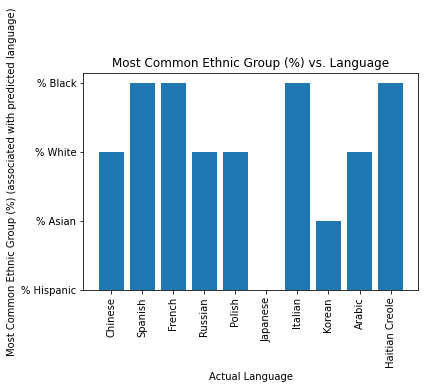

In [10]:
####### [REPLACE WITH LOGISTIC REGRESSION INSTEAD?]
# clustering did not work as intended
# SO MAYBE WE CAN DO BAR GRAPH - predicted language (corresponds to the most common ethnicity) vs. actual language

plt.bar(full_data['Language'], full_data['mostCommonEthnicGroup'])

plt.xlabel('Actual Language')
plt.ylabel('Most Common Ethnic Group (%) (associated with predicted language)')
plt.title('Most Common Ethnic Group (%) vs. Language')
plt.xticks(rotation=90)
plt.show()

# binary –– NOT WORKING :( 

,mostCommonEthnicity,accuracy
0,% Asian,0.600
1,% Black,0.050
2,% Hispanic,0.944
3,% White,0.267


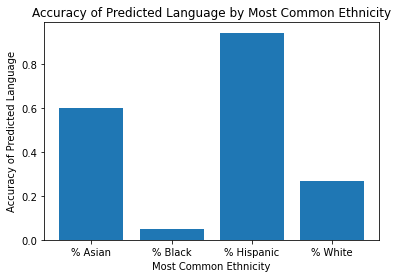

In [11]:
####### [REPLACE WITH LOGISTIC REGRESSION INSTEAD?]
# FOCUS ON ACCURACY INSTEAD
# ex: for all schools with Hispanic as the most common ethnicity, 
# how many schools' actual bilingual language is Spanish? 
# (aka does predicted language = actual language?)

hispanic_school_languages = full_data.loc[ full_data['mostCommonEthnicGroup'] == "% Hispanic", 'Language']
# [IMPORTANT NOTE: what we discovered: data collection was mainly from Hispanic heavy schools –– FILTER OUT transitional schools + keep only dual language]


# FUNCTION TO COMPARE ACCURACY OF PREDICTION
def accuracy_by_language(ethnicity, dataframe): 
#     print(ethnicity)
    percentCorrect = 0
    
    ethnicity_school_languages = full_data.loc[ full_data['mostCommonEthnicGroup'] == ethnicity, 'Language']
#     print("ethnicity_school_languages: ", ethnicity_school_languages)
#     matchedRows = ethnicity_school_languages[full_data['Language'] == "Spanish"]
    
    predicted_language = full_data['predicted_language']
    matchedRows = ethnicity_school_languages[full_data['Language'] == predicted_language]
    
    percentCorrect = round(len(matchedRows) / len(ethnicity_school_languages), 3)
    
    return percentCorrect

accuracyList = []
for ethnicity in mostCommonEthnicGroupList:
#     print(ethnicity)
    if ethnicity != "% Multiple Race Categories Not Represented":
        accuracyList.append(accuracy_by_language(ethnicity, full_data))
        #removed "% Multiple Race Categories Not Represented" because it is never the most common ethnic group in the dataset
# print(accuracyList)

accuracyDF = pd.DataFrame({"mostCommonEthnicity": ['% Asian', '% Black', '% Hispanic', '% White'],
                                        "accuracy": accuracyList})
display(accuracyDF)


# [TODO: do for each language + graph percentages using bar graph!!!]
# then do summary statistics - mean, standard deviation, correlation??

mostCommonEthnicityShort = ['% Asian', '% Black', '% Hispanic', '% White']
plt.bar(mostCommonEthnicityShort, accuracyList)
plt.xlabel('Most Common Ethnicity')
plt.ylabel('Accuracy of Predicted Language')
plt.title('Accuracy of Predicted Language by Most Common Ethnicity')
plt.show()


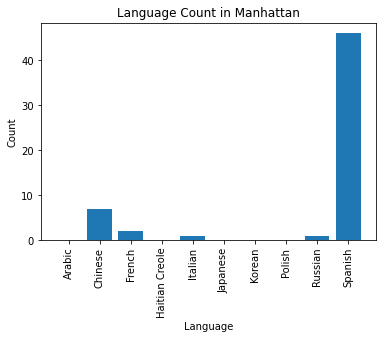

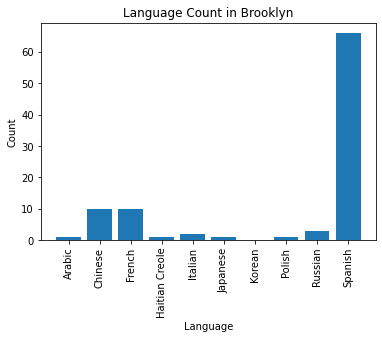

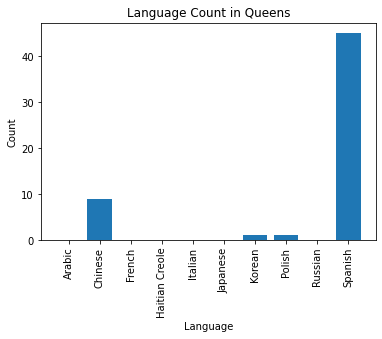

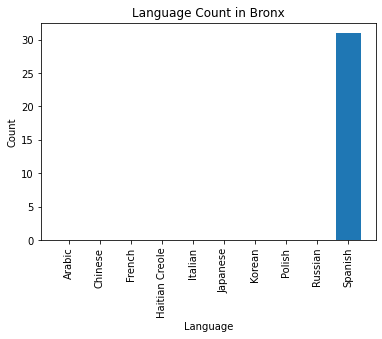

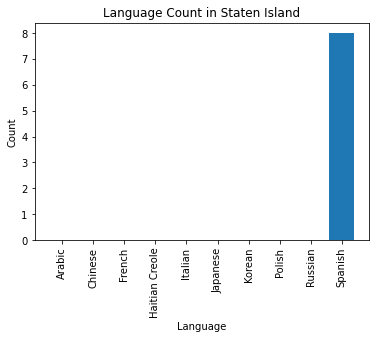

In [12]:
# bar graph of #schools within each borough



# bar graph of one borough's bilingual language count - Manhattan in particular
boroughs = full_data.Borough.unique()

for borough in boroughs: 
    boroughData = full_data[full_data.Borough == borough]
    boroughLanguages = full_data.loc[full_data.Borough == borough, "Language"]

    boroughLanguageCount = []
    for language in languages:
        languageCount = boroughLanguages.isin([language]).sum(axis=0)
        boroughLanguageCount.append(languageCount)

    # print(boroughLanguageCount)

    plt.bar(languages, boroughLanguageCount)
    plt.xlabel('Language')
    plt.ylabel('Count')
    plt.title('Language Count in ' + borough)
    plt.xticks(rotation=90)
    plt.show()

# OBSERVATION: Spanish seems to be the dominating second language in all boroughs

# Data Analysis

#### Here, we focus on analyzing trends among schools with Spanish, Chinese, or French as their selected bilingual languages.

After performing our multinomial logistic regressions, we discovered that most of our data comprised of schools with Spanish, Chinese, or French as their selected bilingual languages. Spanish was the overwhelming majority, with 213 schools choosing it for their bilingual program, while 26 schools had Chinese and 12 schools had French. All other languages like Russian, Italian, and Japanese had only a few schools. Because the amount of data for these schools is too small, we decided to focus on the top 3 languages: Spanish, Chinese, and French. 

We decided to focus specifically on schools that teach Spanish because 1) it is the most common second language in our dataset by an overwhelming amount, and 2) it is the most common second language in the USA. Thus, schools may select Spanish as the second language in their bilingual program regardless of the ethnic breakdown of a school. Because of this, we wanted to at least see if there were any trends/relationships that existed between the ethnic breakdown of each school that selected Spanish, as well as their economic need, male-to-female ratio, and the percent of English language learners.

[HERE, JUSTIFICATION FOR CHINESE + FRENCH –– used to compare??]

In [13]:
spanish_schools_data = bilingual_demographic_data[bilingual_demographic_data["Language"] == "Spanish"]
chinese_schools_data = bilingual_demographic_data[bilingual_demographic_data["Language"] == "Chinese"]
french_schools_data = bilingual_demographic_data[bilingual_demographic_data["Language"] == "French"]

chosenLanguageData = [spanish_schools_data, chinese_schools_data, french_schools_data]
for language in chosenLanguageData: 
    print(len(language))
    
# [PROBLEM: HOW IS SPANISH = 196, SUPPOSED TO BE 213!?]
bilingual_demographic_data["Language"].value_counts()

196
26
12


Spanish           196
Chinese            26
French             12
Russian             4
Italian             3
Polish              2
Korean              1
Japanese            1
Haitian Creole      1
Arabic              1
Name: Language, dtype: Int64

###### ADD AXIS LABELS+TITLES

##### Interpretation and conclusions. 

What did you find over the course of your data analysis, and **how confident are you in these conclusions?** Detail your results more than you did in the introduction, now that the reader is familiar with your methods and analysis. **Interpret these results in the wider context of the real-life application from where your data hails.**

##### Limitations. 

What are the biases in your data or assumptions of your analyses that specifically affect the conclusions you're able to draw?

LANGUAGE: 1    Spanish
Name: Language, dtype: string
The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching 1    Spanish
Name: Language, dtype: string


count    196.000000
mean       0.488357
std        0.030266
min        0.262000
25%        0.471750
50%        0.492000
75%        0.505000
max        0.560000
Name: % Female, dtype: float64

None
variance 	 0.0009160564102564109


The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching 1    Spanish
Name: Language, dtype: string
count    196.000000
mean       0.511643
std        0.030266
min        0.440000
25%        0.495000
50%        0.508000
75%        0.528250
max        0.738000
Name: % Male, dtype: float64
variance 	 0.000916056410256411


The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching 1    Spanish
Name: Language, dtype: string
count    196.000000
mean       1.057525
std        0.166775
min        0.786127
25%        0.980195
50%        1.033058
75%        1.121200
max        2.816000
dtype: float64
variance 	 0.02781399146042727


<ipython-input-14-a545ba9ca6fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  languageData['male_female_ratio'] = male_female_ratio


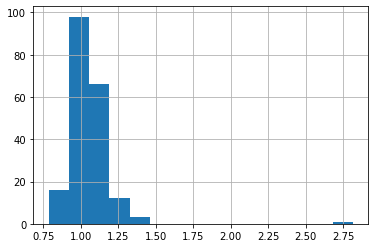

LANGUAGE: 0    Chinese
Name: Language, dtype: string
The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching 0    Chinese
Name: Language, dtype: string


count    26.000000
mean      0.476308
std       0.035358
min       0.408000
25%       0.458500
50%       0.477500
75%       0.496750
max       0.586000
Name: % Female, dtype: float64

None
variance 	 0.0012502215384615383


The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching 0    Chinese
Name: Language, dtype: string
count    26.000000
mean      0.523692
std       0.035358
min       0.414000
25%       0.503250
50%       0.522500
75%       0.541500
max       0.592000
Name: % Male, dtype: float64
variance 	 0.0012502215384615383


The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching 0    Chinese
Name: Language, dtype: string
count    26.000000
mean      1.110185
std       0.153779
min       0.706897
25%       1.014674
50%       1.094496
75%       1.180356
max       1.451613
dtype: float64
variance 	 0.023647890288348673


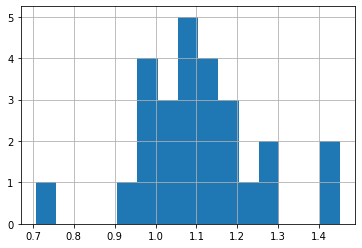

LANGUAGE: Series([], Name: Language, dtype: string)
The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching Series([], Name: Language, dtype: string)


count    12.000000
mean      0.500333
std       0.026099
min       0.454000
25%       0.491500
50%       0.500500
75%       0.513000
max       0.540000
Name: % Female, dtype: float64

None
variance 	 0.0006811515151515155


The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching Series([], Name: Language, dtype: string)
count    12.000000
mean      0.499667
std       0.026099
min       0.460000
25%       0.487000
50%       0.499500
75%       0.508500
max       0.546000
Name: % Male, dtype: float64
variance 	 0.0006811515151515156


The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching Series([], Name: Language, dtype: string)
count    12.000000
mean      1.003945
std       0.105825
min       0.851752
25%       0.950709
50%       0.997253
75%       1.035016
max       1.204380
dtype: float64
variance 	 0.011198877603029168


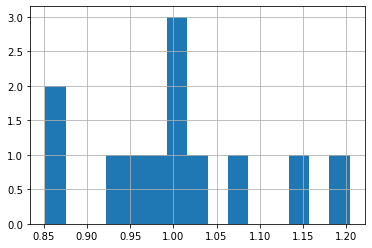

In [14]:
# HISTOGRAM - GENDER DISTRIBUTION AND RATIO
for languageData in chosenLanguageData: 
#     print(languageData.Language)
    language = languageData.Language.loc[:1]
    # [FIX]
    print("LANGUAGE: {}".format(language))

    print("The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching {}".format(language))
    print(display(languageData["% Female"].describe()))
    print("variance \t {}".format(languageData["% Female"].var()))
    print("\n")

    print("The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching {}".format(language))
    print(languageData["% Male"].describe())
    print("variance \t {}".format(languageData["% Male"].var()))
    print("\n")
    
    male_female_ratio = languageData["# Male"] / languageData["# Female"]
    languageData['male_female_ratio'] = male_female_ratio
    # A male:female ratio of 1 means about an there is even 50% / 50% makeup of male vs. females in the school population.

    # print("The Male:Female ratio for each school teaching {}:  \n{}\n".format(language, male_female_ratio))

    print("The count, mean, standard deviation, quantiles, variance, and other stats for the percentage of females in schools teaching {}".format(language))
    print(male_female_ratio.describe())
    print("variance \t {}".format(male_female_ratio.var()))

    
    # DISTRIBUTION OF MALE-FEMALE RATIOS ACROSS ALL SCHOOLS WITH SPANISH, CHINESE, OR FRENCH AS ITS SECOND LANGUAGE
    male_female_ratio.hist(bins=15)
    plt.show()


Within schools that teach Spanish as the second language in their bilingual program, we can see from the histogram that the average male-to-female ratio is about 1.06. This means that most of these schools have an even number of males to females. The standard deviation is also quite low (0.167), meaning the data are clustered around the mean. Because of few extreme values, this means we have a more reliable mean. 

[DESCRIBE MALES + FEMALES SPECIFICALLY? OR DO WE NEED THIS!?]

Now let us compare the gender makeup of schools that selected Spanish with schools that selected Chinese or French, 
[HERE]

LANGUAGE: 1    Spanish
Name: Language, dtype: string


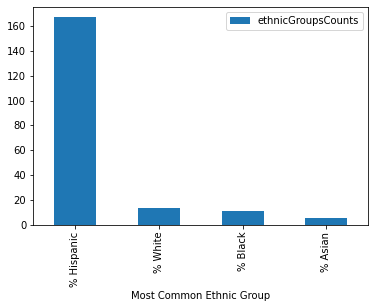

LANGUAGE: 0    Chinese
Name: Language, dtype: string


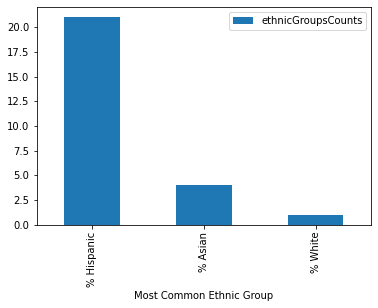

LANGUAGE: Series([], Name: Language, dtype: string)


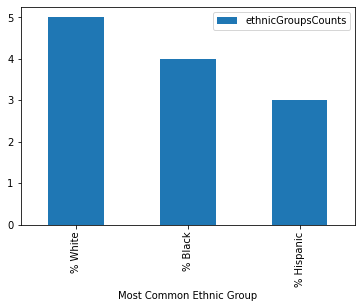

In [16]:
# BAR GRAPH - DISTRIBUTION OF MOST COMMON ETHNIC GROUP ACROSS SCHOOLS SELECTING SPANISH, CHINESE, OR FRENCH
for languageData in chosenLanguageData: 
#     print(languageData.Language)
    language = languageData.Language.loc[:1]
    # [FIX]
    print("LANGUAGE: {}".format(language))
    
    ethnicGroups = languageData['mostCommonEthnicGroup'].unique()
    ethnicGroupsCounts = languageData['mostCommonEthnicGroup'].value_counts()

    df = pd.DataFrame({'Most Common Ethnic Group':ethnicGroups, 'ethnicGroupsCounts':ethnicGroupsCounts})
    ax = df.plot.bar(x='Most Common Ethnic Group', y='ethnicGroupsCounts')
    plt.show()

It is really interesting to see how even though Spanish is indeed the most common second language across the USA and it therefore might be taught at schools regardless of their ethnic breakdown, most schools teaching Spanish actually have Hispanic students as their most common ethnic group. Here in the bar graph, we see that an overwhelming majority of schools teaching Spanish have Hispanic as their most common ethnic group, as compared to White, Black, and Asian. This can hint at a correlation between the most common ethnic group at a particular school and its bilingual language for schools that teach Spanish. In other words, there seems to exist a trend where a school teaching Spanish is likely to have Hispanic students making up most of its student population out of all other ethnicities.

However, it was even more interesting to see that most schools teaching Chinese actually have Hispanic students making up most of its student population out of all other ethnicities. This went against our prediction that schools teaching Chinese would most likely be comprised of mostly Asians. However, the fact that this did not occur actually makes sense because in the real world, Asians rarely make up the majority of most schools in the USA. Thus, it would make sense that there are only a handful of schools that have Asians as the most common ethnic group. As a result, it makes sense that it is very likely that most schools teaching an Asian language like Chinese have a non-Asian ethnic group be the most common ethnicity.

For most schools teaching French, we see that White is the most common ethnicity out of all other ethnic groups. This seems to confirm our intuition/prediction that French, a Romance/European language, would be taught at white-dominating schools. It is also interesting to see that no school teaching French had Asian as its most common ethnic group. This could suggest 

[???] [HERE, FIN]

count    196.000000
mean      83.269898
std       12.168545
min       12.400000
25%       79.225000
50%       87.600000
75%       91.100000
max       94.900000
Name: Economic Need Index, dtype: float64


[]

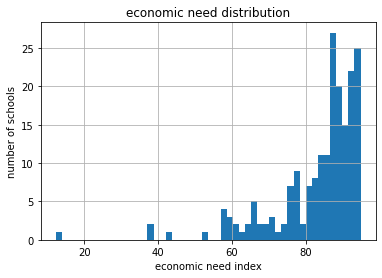

In [24]:
# HISTOGRAM - DISTRIBUTION OF ECONOMIC NEED INDEX 
economic_need = spanish_schools_data["Economic Need Index"]
print(economic_need.describe())

economic_need.hist(bins=50)
plt.title("economic need distribution")
plt.xlabel("economic need index")
plt.ylabel("number of schools")
plt.plot()
# bilingual_demographic_data

The economic need index of the schools that have Spanish as their main language in our dataset tend to have a higher economic need index as more of the Spanish schools fell in the portion after 80% indicating that many schools had an economic need index greater than 80%. In fact, the median economic need rate is 87.6% which shows that 50% of the Spanish schools are in fact above 87.6% economic need rate.

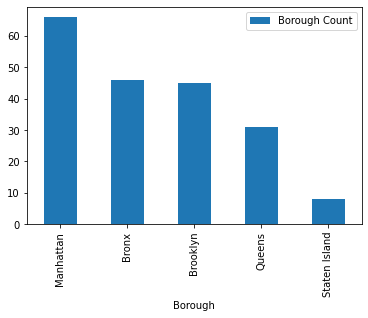

In [25]:
# BAR GRAPH - DISTRIBUTION OF BOROUGHS FOR SPANISH SCHOOLS
boroughs = spanish_schools_data['Borough'].unique()
boroughCounts = spanish_schools_data['Borough'].value_counts()

df = pd.DataFrame({'Borough':boroughs, 'Borough Count':boroughCounts})
ax = df.plot.bar(x='Borough', y='Borough Count')

count    196.000000
mean       0.238929
std        0.124517
min        0.020000
25%        0.145000
50%        0.213000
75%        0.324250
max        0.602000
Name: % English Language Learners, dtype: float64


<AxesSubplot:>

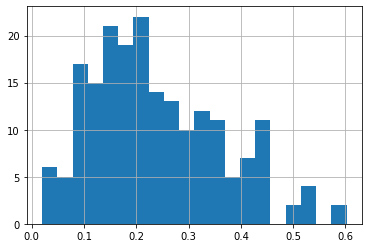

In [27]:
# HISTOGRAM - DISTRIBUTION OF % ENGLISH LANGUAGE LEARNERS 
engl_lang_learners = spanish_schools_data["% English Language Learners"]
print(engl_lang_learners.describe())

engl_lang_learners.hist(bins=20)
# bilingual_demographic_data

<AxesSubplot:xlabel='mostCommonEthnicGroup', ylabel='male_female_ratio'>

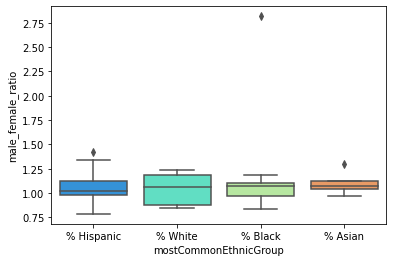

In [28]:
# BOX PLOT - male/female ratio vs. %[most common ethnic group] per school
# bilingual_demographic_data.plot.scatter(x='mostCommonEthnicGroup', y='male_female_ratio',c='DarkBlue')
sns.boxplot(x='mostCommonEthnicGroup',y='male_female_ratio',data=spanish_schools_data, palette='rainbow')

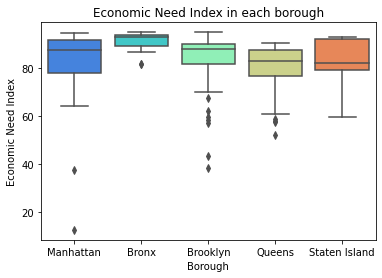

In [31]:
# BOX PLOT - economic need index vs. borough per school
sns.boxplot(x='Borough',y='Economic Need Index',data=spanish_schools_data, palette='rainbow')
plt.title("Economic Need Index in each borough")
plt.show()

For schools that taught Spanish, their economic need index median was 87.6% which is considerably high. As a result, we wanted to further our investigation by looking into which borough would have the highest economic need index and what we found was that the Bronx in fact, had the highest median in terms of economic need index for schools that taught Spanish. What was really interesting was that Bronx had a very small range of economic need index in comparison to other boroughs which shows that in general, the Bronx has a very high economic need index especially for schools that teach Spanish.


## One limitation 
- We can't compare the economic need index of each borough fairly because we don't have the same amount of schools in each borough and the sample size probably isn't representative of the whole borough.

<AxesSubplot:xlabel='mostCommonEthnicGroup', ylabel='Economic Need Index'>

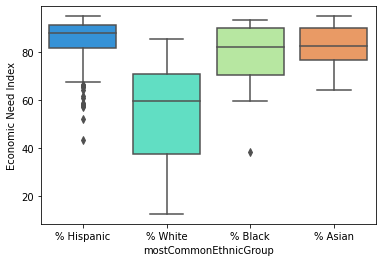

In [32]:
# BOX PLOT - economic need index vs. %[most common ethnic group] per school
sns.boxplot(x='mostCommonEthnicGroup',y='Economic Need Index',data=spanish_schools_data, palette='rainbow')

<AxesSubplot:xlabel='Borough', ylabel='% English Language Learners'>

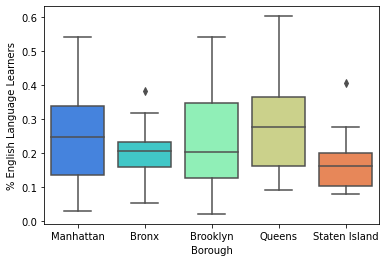

In [34]:
# BOX PLOT - % english language learners vs. borough per school
sns.boxplot(x='Borough',y='% English Language Learners',data=spanish_schools_data, palette='rainbow')

<AxesSubplot:xlabel='male_female_ratio', ylabel='Economic Need Index'>

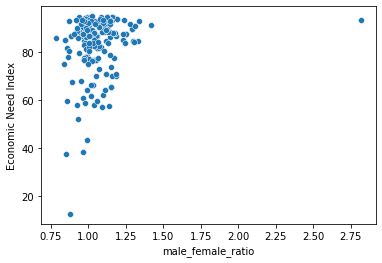

In [35]:
# SCATTERPLOT - male/female ratio vs. economic need index
sns.scatterplot(x='male_female_ratio',y='Economic Need Index',data=spanish_schools_data, palette='rainbow')
# LOG MALE_FEMALE_RATIO B/C OF OUTLIER!?

<AxesSubplot:xlabel='% English Language Learners', ylabel='Economic Need Index'>

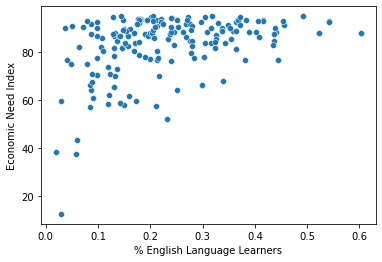

In [36]:
# SCATTERPLOT - % english language learners vs. economic need index
sns.scatterplot(x='% English Language Learners',y='Economic Need Index',data=spanish_schools_data, palette='rainbow')

We thought that there would be a relationship beween the economic need index and the percentage of english alnguage learners present in the school. Our initial thought was that if there were a greater number of english language learners, then the economic need index is perhaps higher because students who are learning English may have come from an underdeveloped nation in pursuit of more opportunities and are therefore, not in the best financial situation just starting out in a new school system in a whole different language. However, as shown on the scatterplot, this is not the case as predicted. In fact, we see that regardless of the percentage of English language learners, the economic need index is regardless, quite high. For example, for schools with 0.1 or 0.2% of English language learners, the economic need index is around 880% and as we increase the number of English Lnaguage learners, the economic need index rate is still around 80%. 

 One limitation, 
 - We do not have enough schools with higher percentage of english language learners to truly compare if the economic need index and the english language learners is correlated. To further our investigation, it would be interesting if we could gather more data on schools with a greater percentage of English language Learners to understand in greater depth how economic need index might be correlated with the number of english language learners present in the school.
 
 - 
 
- perhaps we can run a correlation on this??? 

## Data Limitations 

One potential problem with our datasets is the fact that the list of bilingual schools programs is the final publication for the year 2020-2021, while our demographic data is based on 2019-2020 data. However, because it would likely take longer than one school year for the demographics of an area to change a notable amount that it would make a change when doing data analysis, this should not be a substantial problem.

Another potential problem could be the specificity of the raw data. For example, the raw bilingual school data designates the schools by borough and district, however, if we want to get more specific about the location, the zip code of the school might be needed. However, this potential could be solved by manually entering this data based on the name of the school. Furthermore, the raw data does not provide the ethnic breakdown of the individual school. Therefore, when mapping the bilingual data to the demographic data, we might be overlooking the fact that the makeup of the school might not match the demographic makeup of the neighborhood. This could be because children might not always go to the school that is closest to them, but they could be traveling outside of their zone. For elementary schools, because of severe overcrowding in some neighborhoods and certain schools being more popular, some children will be assigned to another school outside of their zone. For middle school, there are zoned schools, where most students go, but there are also choice districts, where students are guaranteed a seat in the district, but can apply to the school that they like, which could be outside of the zone in which they live. For high school, students can choose schools elsewhere in the city from where they live. Therefore, there could be problems regarding mapping demographics to schools based solely on location.

Another potential limitiation to this data is that there are multiple lanauges that could correspond to a specific ethnic group. For example, there are language programs in Chinese, Korean, and Japanese, but these individual races are not specified in the demography data; there is only Asian. This coudl also happen with lanauges such as French, Russian, Italian, and Polish. This could be possibly be addressed by grouping the certain languages together. This could end up making too many assumptions about the population, especially about who speaks what language. To combat this, we look into getting more specific demographic data if this becomes a central part of the project.

## Preregistered Analyses 

1. Multinomial logistic regression - input: demographic vector where each element is the percentage of each race (ex: [0.5, 0.3, 0.2] represents the percentage of white, black, and Asians in the school population respectively), output: predicted bilingual language
    - Alternatively (because we haven’t learned multinomial logistic regression): for each language, perform a Binary logistic regression - input: demographic vector where each element is the percentage of each race, output: probability that a school has this specific language in its bilingual program.


2. Multinomial logistic regression - input: economic need index, output: language
    - Alternatively (because we haven’t learned multinomial logistic regression): for each language, perform a Binary logistic regression - input: economic need index of each school (percentage), output: probability that a school has this specific language in its bilingual program

## Hypotheses for the Preregistered Analyses

1. We expect that this test will yield mild accuracy (60%) for predicting the major demographic of the school and the language offered at the school. We believe our model may somewhat accurately predict the correct corresponding language given the ethnic breakdown of a school. Looking at the results from our exploratory data analysis, we saw that the majority of the language programs were in Spanish. This makes sense because the second most common language in the USA as a whole is Spanish, so it would make sense that most schools would opt to teach Spanish as the second language regardless of ethnic breakdown, yet there are also schools where the major ethnic group is Hispanic. The results would be interesting because it would show whether or not the major demographic group in a school determines or has any influence on what language program is offered. It would also guide us forward in our analysis of other factors that could be the leading influence in determining the language for a language program.

2. We believe our model will not accurately predict the correct corresponding language given the economic index of a school. This is because we do not believe that certain languages map to certain economic indices. For example, Spanish can be taught at schools that differ greatly in wealth (for example, since Spanish is the second most common language in the USA, schools of all wealth levels can opt to teach it as a second language. This could then mean there is no correlation between economic need index and bilingual language). The results of this would be interesting because it would show if there is a relationship between the language offered and economic need. It would be interesting to show what relationship there is if one exists, but it would also be just as interesting to note if there were no relationship at all. In the case that our model does accurately predict the language based on economic need index, this can hint that there is indeed a relationship/correlation between these two variables. This could make sense because wealthier schools may have greater access to resources for less common languages like Arabic.
